## Введение в анализ данных, ИАД-1

## НИУ ВШЭ, 2018-19 учебный год

### Домашнее задание №2

Задание выполнил(а): _Самоделкина Мария_

### Общая информация

__Дата выдачи:__ 25.02.2019

__Дедлайн:__ 23:59 5.03.2019

### О задании

В данном домашнем задании вы реализуете линейную регрессию своими руками и сравните её с версией в scikit-learn.

### Оценивание и штрафы

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

__Стирать условия нельзя!__

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Формат названия файла: homework_02_Фамилия_Имя.ipynb

## Часть 1. Обыкновенная линейная регрессия

In [123]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### 1 (4 балла). 
На семинаре мы начали реализовывать класс линейной регрессии; теперь необходимо его закончить. 

In [124]:
class LinReg():
    def __init__(self, step_size=0.01, num_steps=20, eps=1e-6):
        self.w = None # веса
        self.step_size = step_size
        self.num_steps = num_steps
        self.eps = eps
    
    def __calc_grad(self, X_train, y_train):
        return 2 * np.dot(np.transpose(X_train), (np.dot(X_train, self.w) - y_train)) / X_train.shape[0]
    #нужно поделить на l (количество элементов выборки), т.к. функция ошибки - MSE
    
    def fit(self, X_train, y_train):
        #Условия останова необходимо проверять на каждой итерации
        self.w = np.random.rand(X_train.shape[1]) * 4 - 2
        for i in range(self.num_steps):
            x = self.w - self.step_size * self.__calc_grad(X_train, y_train)
            if np.linalg.norm(self.w - x) < self.eps:
                self.w = x
                break
            self.w = x
        return self
        
    def predict(self, X_test):
        return np.dot(X_test, self.w)

### 2 (3 балла). 
Проверим корректность работы класса на датасете Boston Housing. 
* Загрузите его из sklearn
* Проведите предобработку данных(нормализация вещественных признаков, one-hot encoding категориальных)
* Разделите на обучение и контроль в соотношении 80:20 с random_seed 42 (самый популярный в прошлом задании)
* Обучите собственную реализацию регрессии и сравните по метрикам MAE и RMSE с LinearRegression из sklearn.

In [125]:
from sklearn.datasets import load_boston
from math import sqrt
data = load_boston()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
#Предобработка данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()
col_names = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT']
features = df_scaled[col_names]
features = scaler.fit_transform(features.values)
df_scaled[col_names] = features
df_scaled['w0'] = np.ones(df_scaled.shape[0])
#Добавляем единичный столбец (столбец свободного коэффициента)
#Анализ описания признаков показал, что признаки только вещественные. CHAS - бинарный
#Предобработка целевой переменной
target = np.array(data['target'])
target = np.array(target).reshape(-1,1)
target = scaler.fit_transform(target)
target = target.flatten()
X_train, X_test, y_train, y_test = train_test_split(df_scaled, target, test_size = 1/5, random_state = 42)

In [126]:
lr1 = LinReg(step_size=0.01, num_steps=20)
lr1.fit(X_train, y_train)
print('RMSE:',sqrt(mean_squared_error(y_test, lr1.predict(X_test))),'MAE:', mean_absolute_error(y_test, lr1.predict(X_test)))
print('Веса:', *lr1.w)

RMSE: 2.378961145264222 MAE: 1.9387378989341935
Веса: 0.5990665133596235 -0.3052124797460163 0.45828911172298836 1.703307547691866 0.9477158501633003 1.448354984587299 -0.8021282210379282 0.8093583206454582 0.7119371757528099 -1.3537173574230579 -1.2814471237744491 -0.8050853548658387 0.3130148039190123 -0.974381000177249


In [127]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print('RMSE:',sqrt(mean_squared_error(y_test, lr.predict(X_test))),'MAE:', mean_absolute_error(y_test, lr.predict(X_test)))
print('Веса:', *lr.coef_)

RMSE: 0.5364166292540399 MAE: 0.3470927251421174
Веса: -0.10573498139698878 0.07635554387641734 0.030121002373272518 0.3030512303762731 -0.21674226515888048 0.33910692739172466 -0.01927078627801968 -0.33149399414672426 0.24845252985798236 -0.19510257109694043 -0.21549314557365626 0.12260526992220991 -0.39487862596732337 0.0


Собственная реализация регрессии дает почти одинаковые RMSE и MAE с LinearRegression из sklearn при длине шага 0.001 и количестве шагов 10000. Если брать длину шага больше, а количество шагов меньше, то результаты собственной реализации хуже примерно в полтора раза.

### 3 (3 балла). 
Линейная регрессия зачастую легко переобучается - модель необходимо штрафовать за величину весов; для этого применяют L1 и L2 регуляризацию: добавление нормы весов к функции потерь. В случае L2-регулязации функционал будет выглядеть как

$$ L = (Xw - y)^T(Xw - y) + \lambda||w||_2 $$.

Параметр $\lambda$ подбирается на отложенной выборке или по кросс-валидации.

* Реализуйте обучение линейной регрессии с L2-регуляризацией
* Найдите оптимальный с точки зрения метрики MAE коэффициент $\lambda$ (по кросс-валидации)
* Постройте график зависимости метрики на тестовой выборке от $\lambda$ (__подпишите оси__)
* Сравните результаты с Ridge регрессией из sklearn (аналогично пункту 2).

In [128]:
class LinRegL2():
    def __init__(self, step_size=0.01, num_steps=20, eps=1e-6, L = 5):
        self.w = None # веса
        self.step_size = step_size
        self.num_steps = num_steps
        self.eps = eps
        self.L = L
    
    def __calc_grad(self, X_train, y_train):
        return 2 * np.dot(np.transpose(X_train), (np.dot(X_train, self.w) - y_train))/ X_train.shape[0] + 2 * self.L * self.w
    
    def fit(self, X_train, y_train):
        self.w = np.random.rand(X_train.shape[1]) * 4 - 2
        for i in range(self.num_steps):
            x = self.w - self.step_size * self.__calc_grad(X_train, y_train)
            if np.linalg.norm(self.w - x) < self.eps:
                self.w = x
                break
            self.w = x
        return self
        
    def predict(self, X_test):
        return np.dot(X_test, self.w)

lr2 = LinRegL2()
X_train, X_test, y_train, y_test = train_test_split(df_scaled, target, test_size = 1/5, random_state = 42)
lr2.fit(X_train, y_train)
print("MAE:", mean_absolute_error(y_test, lr2.predict(X_test)))
print("Веса:", *lr2.w)

MAE: 0.45129016529396776
Веса: -0.11692864870187884 0.014018428881950923 -0.18244892829674736 -0.07385780253528193 -0.007755876827005398 0.03523165225816398 -0.10793125630378732 -0.08581079343423736 -0.04979259073561795 0.186651717559616 -0.11567471012285242 0.011027726747924927 -0.15351414718683476 -0.09714306049904914


L = 7 , MAE min = 0.5555932079101142


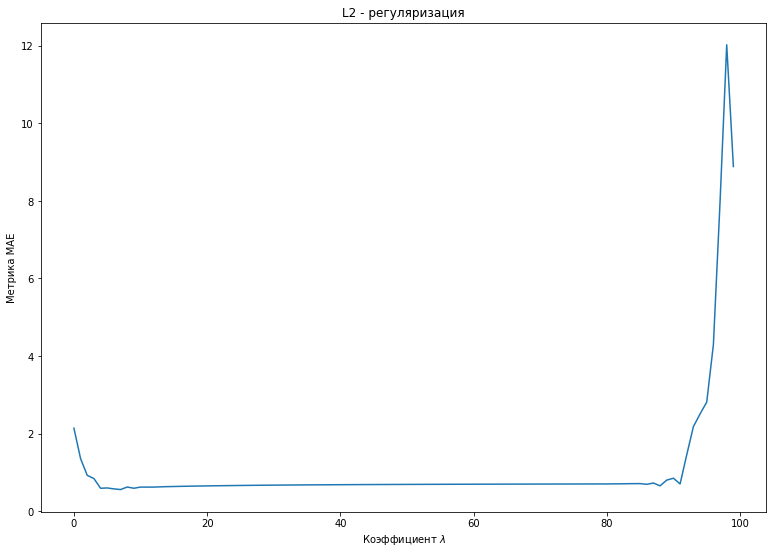

In [129]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle = True, random_state = 42)
mae = []
for i in range(0, 100):
    lr2 = LinRegL2(L = i)
    mae1 = 0
    for train, test in kf.split(df_scaled):
        X_train, X_test = df_scaled.iloc[train], df_scaled.iloc[test]
        y_train, y_test = target[train], target[test]
        lr2.fit(X_train, y_train)
        mae1 += mean_absolute_error(y_test, lr2.predict(X_test))
    mae.append(mae1/5)
print('L =', mae.index(min(mae)), ', MAE min =', min(mae))
#Записываем историю, чтобы построить график
import matplotlib.pyplot as plt
from matplotlib import cm
plt.figure(figsize=(13, 9))
plt.plot(range(0, 100), mae)
plt.xlabel('Коэффициент $\lambda$')
plt.ylabel('Метрика MAE')
plt.title('L2 - регуляризация') 
plt.show()

По кросс-валидации видно, что MAE не сильно отличается на выбоках. Наиболее минимальная ошибка при L порядка до 10.

Слишком маленький $\lambda$ дает ошибку. При $\lambda$ до ~90 ошибка меньше и устойчивее. После 90 видно, что модель переобучается. Результат сильно зависит от заданного количества шагов и длины шага.

L = 51 , MAE min = 0.41390908189505743
Веса: -0.09610422396855596 0.06219568622236883 -0.0313102458665292 0.07742525342863035 -0.06875983386075876 0.3547835279264628 -0.012497793280078941 -0.17292187949461 0.0975290711888103 -0.05625594329562804 -0.15820080875897383 0.01875810561017255 -0.3269464831894783 0.0


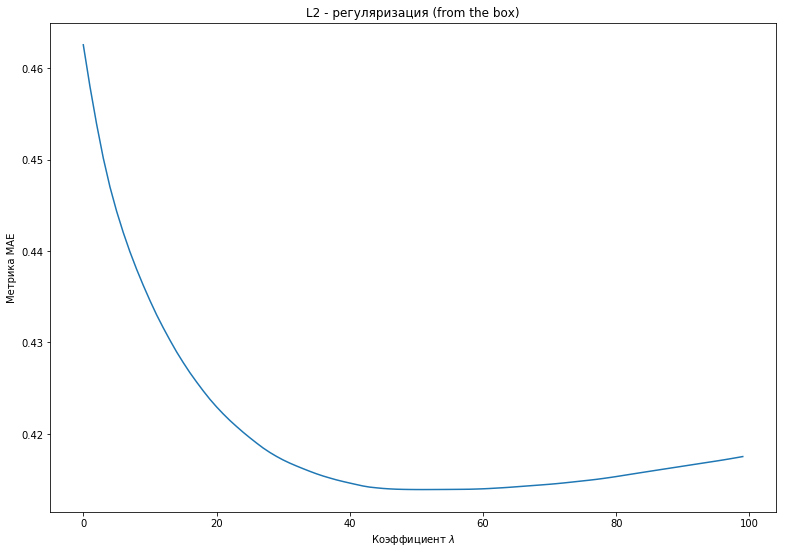

In [130]:
from sklearn.linear_model import Ridge
mae = []
for i in range(0, 100):
    lrR = Ridge (alpha = i)
    mae1 = 0
    for train, test in kf.split(df_scaled):
        X_train, X_test = df_scaled.iloc[train], df_scaled.iloc[test]
        y_train, y_test = target[train], target[test]
        lrR.fit(X_train, y_train)
        mae1 += mean_absolute_error(y_test, lrR.predict(X_test))
    mae.append(mae1/5)
print('L =', mae.index(min(mae)), ', MAE min =', min(mae))
print('Веса:', *lrR.coef_)
plt.figure(figsize=(13, 9))
plt.plot(range(0, 100), mae)
plt.xlabel('Коэффициент $\lambda$')
plt.ylabel('Метрика MAE')
plt.title('L2 - регуляризация (from the box)') 
plt.show()

Минимум ошибки при коэффициенте равном 51. MAE меньше, чем в собственной релизации. График зависимости MAE для $\lambda$ более гладкий и равномерный.

### 4 (Бонус, 4 балла). 
* Реализуйте обучение линейной регрессии с L1-регуляризацией (класс RegL1)
* Проведите сравнения аналогично пункту 3 (но с Lasso вместо Ridge).

L = 0.74 , MAE min = 0.4887818284134178


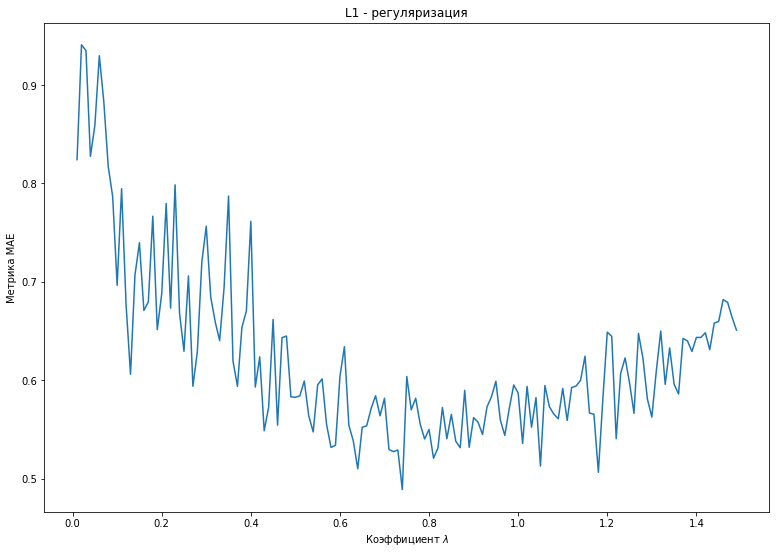

In [131]:
class RegL1():
    def __init__(self, step_size=0.01, num_steps=100, eps=1e-6, L = 100):
        self.w = None # веса
        self.step_size = step_size
        self.num_steps = num_steps
        self.eps = eps
        self.L = L
    
    def __calc_grad(self, X_train, y_train):
        return 2 * np.dot(np.transpose(X_train), (np.dot(X_train, self.w) - y_train))/ X_train.shape[0] + self.L * np.sign(self.w)
    
    def fit(self, X_train, y_train):
        self.w = np.random.rand(X_train.shape[1]) * 4 - 2
        for i in range(self.num_steps):
            x = self.w - self.step_size * self.__calc_grad(X_train, y_train)
            if np.linalg.norm(self.w - x) < self.eps:
                self.w = x
                break
            self.w = x
        return self
        
    def predict(self, X_test):
        return np.dot(X_test, self.w)
    
kf = KFold(n_splits=5, shuffle = True, random_state = 42)
mae = []
for i in frange(0.01, 1.5, 0.01):
    lr1 = RegL1(L = i)
    mae1 = 0
    for train, test in kf.split(df_scaled):
        X_train, X_test = df_scaled.iloc[train], df_scaled.iloc[test]
        y_train, y_test = target[train], target[test]
        lr1.fit(X_train, y_train)
        mae1 += mean_absolute_error(y_test, lr1.predict(X_test))
    mae.append(mae1/5)
print('L =', mae.index(min(mae))*0.01 + 0.01, ', MAE min =', min(mae))
plt.figure(figsize=(13, 9))
plt.plot(list(frange(0.01, 1.5, 0.01)), mae)
plt.xlabel('Коэффициент $\lambda$')
plt.ylabel('Метрика MAE')
plt.title('L1 - регуляризация') 
plt.show()

Наиболее минимальная ошибка сильно варьируется при разных L. Ошибка сходится медленне и менее устойчива в отличие от L2 - регуляризации.

In [132]:
#для удобства реализуем итератор
def frange(x, y, step):
      while x < y:
            yield x
            x += step

alpha = 0.01 , MAE min = 0.3655609065112247


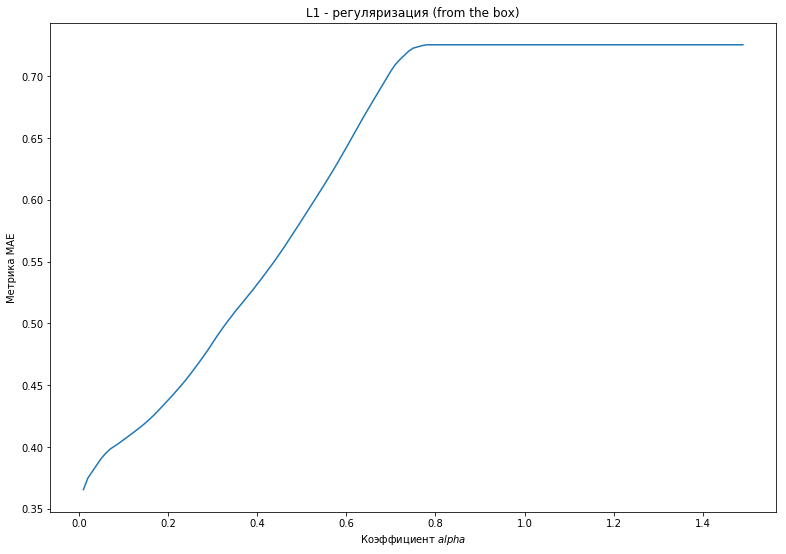

In [133]:
from sklearn.linear_model import Lasso
mae = []
for i in frange(0.01, 1.5, 0.01):
    lrL = Lasso (alpha = i)
    mae1 = 0
    for train, test in kf.split(df_scaled):
        X_train, X_test = df_scaled.iloc[train], df_scaled.iloc[test]
        y_train, y_test = target[train], target[test]
        lrL.fit(X_train, y_train)
        mae1 += mean_absolute_error(y_test, lrL.predict(X_test))
    mae.append(mae1/5)
print('alpha =', mae.index(min(mae))*0.01 + 0.01, ', MAE min =', min(mae))
plt.figure(figsize=(13, 9))
plt.plot(list(frange(0.01, 1.5, 0.01)), mae)
plt.xlabel('Коэффициент $alpha$')
plt.ylabel('Метрика MAE')
plt.title('L1 - регуляризация (from the box)') 
plt.show()

Lasso имеет меньший MAE в отличие от собственной релизации.

### 5 (Бонус, 2 балла). 
Исследуйте для реализации регрессии с L2-регуляризацией зависимость качества на тестовой выборке (с графиками) от:
* Длины шага
* Количества шагов спуска
* Константы epsilon.

Оптимальная длина шага = 0.00801 , MAE min = 0.5034745692038234


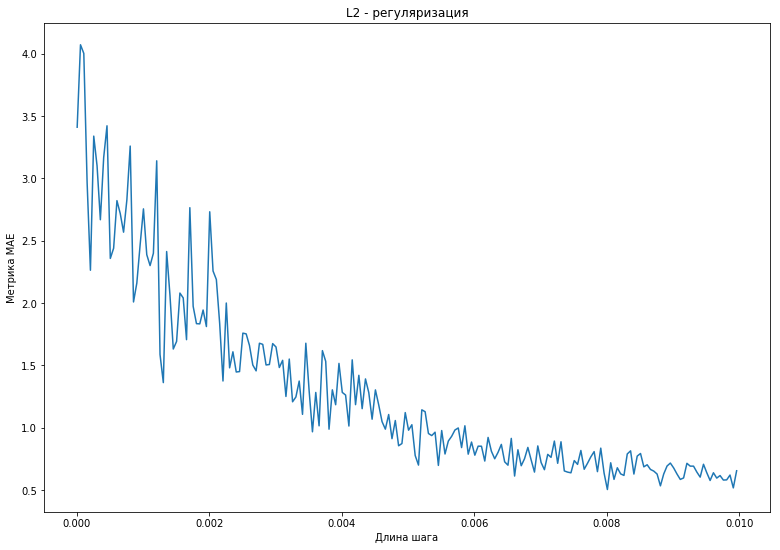

In [134]:
kf = KFold(n_splits=5)
mae = []
for i in frange(0.00001, 0.01, 0.00005):
    lr2 = LinRegL2(step_size = i)
    mae1 = 0
    for train, test in kf.split(df_scaled):
        X_train, X_test = df_scaled.iloc[train], df_scaled.iloc[test]
        y_train, y_test = target[train], target[test]
        lr2.fit(X_train, y_train)
        mae1 += mean_absolute_error(y_test, lr2.predict(X_test))
    mae.append(mae1/5)
print('Оптимальная длина шага =', mae.index(min(mae))*0.00005 + 0.00001, ', MAE min =', min(mae))
plt.figure(figsize=(13, 9))
plt.plot(list(frange(0.00001, 0.01, 0.00005)), mae)
plt.xlabel('Длина шага')
plt.ylabel('Метрика MAE')
plt.title('L2 - регуляризация') 
plt.show()

Слишком маленький шаг - это плохо. При небольшом увеличении сходимость улучшается. Далее будет расходиться.

Оптимальное количество шагов спуска = 30 , MAE min = 0.5570344287817364


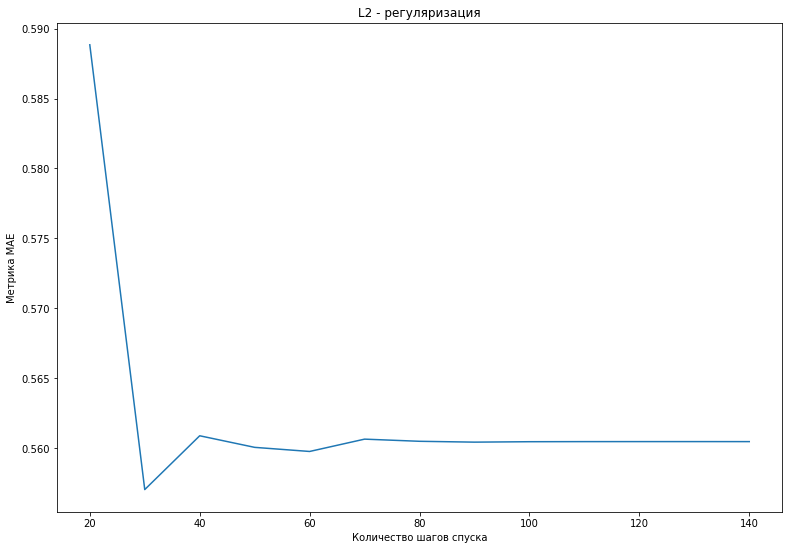

In [135]:
kf = KFold(n_splits=5)
mae = []
for i in range(20, 150, 10):
    lr2 = LinRegL2(num_steps = i)
    mae1 = 0
    for train, test in kf.split(df_scaled):
        X_train, X_test = df_scaled.iloc[train], df_scaled.iloc[test]
        y_train, y_test = target[train], target[test]
        lr2.fit(X_train, y_train)
        mae1 += mean_absolute_error(y_test, lr2.predict(X_test))
    mae.append(mae1/5)
print('Оптимальное количество шагов спуска =', mae.index(min(mae))*10 + 20, ', MAE min =', min(mae))
plt.figure(figsize=(13, 9))
plt.plot(range(20, 150, 10), mae)
plt.xlabel('Количество шагов спуска')
plt.ylabel('Метрика MAE')
plt.title('L2 - регуляризация') 
plt.show()

С увеличением шагов спуска ошибка стабилизируется (точка выхода будет из-за эпсилон). Слишком маленькое количество шагов - тоже плохо.

Оптимальный эпислон = 0.048010000000000004 , MAE min = 0.49638380516217484


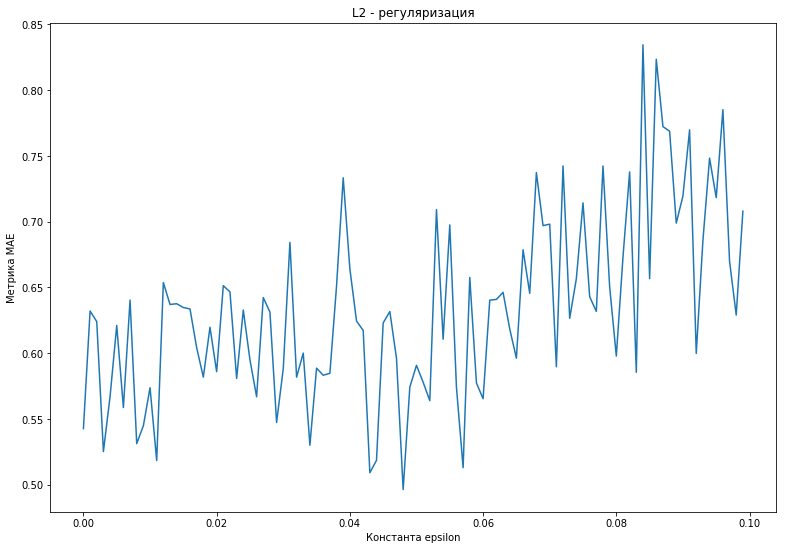

In [136]:
kf = KFold(n_splits=5)
mae = []
for i in frange(0.000001, 0.1, 0.001):
    lr2 = LinRegL2(eps = i)
    mae1 = 0
    for train, test in kf.split(df_scaled):
        X_train, X_test = df_scaled.iloc[train], df_scaled.iloc[test]
        y_train, y_test = target[train], target[test]
        lr2.fit(X_train, y_train)
        mae1 += mean_absolute_error(y_test, lr2.predict(X_test))
    mae.append(mae1/5)
print('Оптимальный эпислон =', mae.index(min(mae))*0.001 + 0.00001, ', MAE min =', min(mae))
plt.figure(figsize=(13, 9))
plt.plot(list(frange(0.000001, 0.1, 0.001)), mae)
plt.xlabel('Константа epsilon')
plt.ylabel('Метрика MAE')
plt.title('L2 - регуляризация') 
plt.show()

В общем случае, при правильно подобранном коэффициенте регуляризации, количестве шагов и длине шага, 
ошибка не сильно зависит от эпсилон. Можно заметить тенденцию, что при больших эпсилон ошибка увеличивается.

### 6 (Бонус, 0 баллов). 
Вставьте сюда любимую картинку, которая сможет поднять настроение ассистенту и семинаристу

![qaEe_7JVmro.jpg](attachment:qaEe_7JVmro.jpg)